In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('traffic.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [3]:
daily_data = data.resample('d').sum()[['Fremont Bridge Total']]
daily_data.head()

,Fremont Bridge Total
Date,
2012-10-03,7042.0
2012-10-04,6950.0
2012-10-05,6296.0
2012-10-06,4012.0
2012-10-07,4284.0


<AxesSubplot:xlabel='Date'>

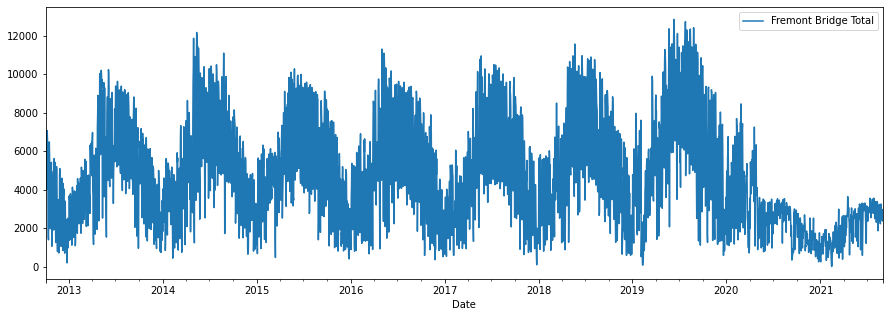

In [4]:
daily_data[['Fremont Bridge Total']].plot(figsize=(15,5))

In [5]:
daily_data['day_of_week'] = daily_data.index.dayofweek
daily_data['month'] = daily_data.index.month
daily_data['year'] = daily_data.index.year
daily_data.head()

,Fremont Bridge Total,day_of_week,month,year
Date,,,,
2012-10-03,7042.0,2,10,2012
2012-10-04,6950.0,3,10,2012
2012-10-05,6296.0,4,10,2012
2012-10-06,4012.0,5,10,2012
2012-10-07,4284.0,6,10,2012


In [6]:
'time range'
data.index.max(), data.index.min()

(Timestamp('2021-08-31 23:00:00'), Timestamp('2012-10-03 00:00:00'))

In [7]:
# covid pandemic
daily_data['covid'] = (daily_data.index>'2020-03').astype(int)

In [8]:
# holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012-10-03','2021-08-31')
daily_data['holiday'] = (pd.Series(1, index=holidays,name='holiday'))
daily_data['holiday'].fillna(0, inplace=True)

In [9]:
daily_data.holiday.value_counts()

0.0    3166
1.0      89
Name: holiday, dtype: int64

In [10]:
'add hours_of_daylight column'
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    'this function computes the hours of daylight for a particular date and latitude'
    days = (date-pd.to_datetime('2000-12-21')).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days*2*np.pi/365.25)))
    return 24.*np.degrees(np.arccos(1-np.clip(m,0,2,))) / 180

In [11]:
daily_data['hours_daylight'] = daily_data.index.map(hours_of_daylight)

<AxesSubplot:xlabel='Date'>

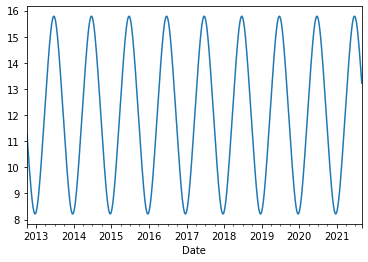

In [12]:
daily_data.hours_daylight.plot()

In [13]:
weather_data = pd.read_csv('weather_Seattle.csv', index_col='DATE',parse_dates=True)
weather_data.head()

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5
DATE,,,,,,,,,,,,,,,
2012-01-01,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.00,0.0,0.0,NaN,55,41,100.0,90.0,19.9,25.1
2012-01-02,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.07,NaN,NaN,0.43,0.0,0.0,NaN,51,37,180.0,200.0,29.1,40.0
2012-01-03,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",5.14,NaN,NaN,0.03,0.0,0.0,NaN,53,45,180.0,170.0,12.1,15.0
2012-01-04,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",10.51,NaN,NaN,0.80,0.0,0.0,NaN,54,42,180.0,190.0,23.9,33.1
2012-01-05,USW00024233,"SEATTLE TACOMA AIRPORT, WA US",13.65,NaN,NaN,0.05,0.0,0.0,NaN,48,37,200.0,220.0,23.9,36.9


<AxesSubplot:xlabel='DATE'>

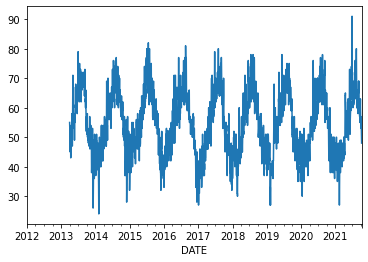

In [14]:
# TAVG column has some missing values 
weather_data.TAVG.plot()

<AxesSubplot:xlabel='DATE'>

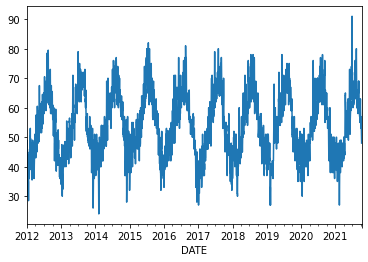

In [15]:
# fix TAVG column
weather_data.TAVG.fillna(0.5*(weather_data.TMAX+weather_data.TMIN), inplace=True)
weather_data.TAVG.plot()

<AxesSubplot:xlabel='DATE'>

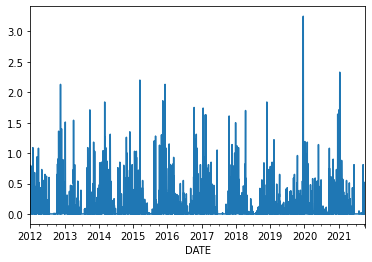

In [16]:
weather_data.PRCP.plot()

<AxesSubplot:xlabel='DATE'>

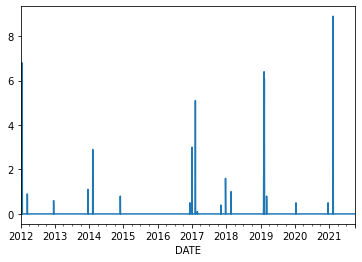

In [17]:
weather_data.SNOW.plot()

<AxesSubplot:xlabel='DATE'>

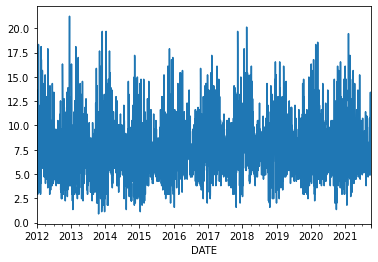

In [18]:
weather_data.AWND.plot()

In [19]:
daily_data['TAVG'] = weather_data.TAVG
daily_data['PRCP'] = weather_data.PRCP
daily_data['AWND'] = weather_data.AWND
daily_data['SNOW'] = weather_data.SNOW

In [20]:
daily_data.head()

,Fremont Bridge Total,day_of_week,month,year,covid,holiday,hours_daylight,TAVG,PRCP,AWND,SNOW
Date,,,,,,,,,,,
2012-10-03,7042.0,2,10,2012,0,0.0,11.277359,56.0,0.0,16.33,0.0
2012-10-04,6950.0,3,10,2012,0,0.0,11.219142,56.5,0.0,14.54,0.0
2012-10-05,6296.0,4,10,2012,0,0.0,11.161038,59.5,0.0,12.75,0.0
2012-10-06,4012.0,5,10,2012,0,0.0,11.103056,60.5,0.0,11.41,0.0
2012-10-07,4284.0,6,10,2012,0,0.0,11.045208,60.5,0.0,2.91,0.0


In [21]:
daily_data.isna().sum()

Fremont Bridge Total    0
day_of_week             0
month                   0
year                    0
covid                   0
holiday                 0
hours_daylight          0
TAVG                    0
PRCP                    0
AWND                    0
SNOW                    0
dtype: int64

# Linear Model

In [22]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [23]:
y = daily_data['Fremont Bridge Total']
X = daily_data.drop('Fremont Bridge Total',axis=1)
X.head()

,day_of_week,month,year,covid,holiday,hours_daylight,TAVG,PRCP,AWND,SNOW
Date,,,,,,,,,,
2012-10-03,2,10,2012,0,0.0,11.277359,56.0,0.0,16.33,0.0
2012-10-04,3,10,2012,0,0.0,11.219142,56.5,0.0,14.54,0.0
2012-10-05,4,10,2012,0,0.0,11.161038,59.5,0.0,12.75,0.0
2012-10-06,5,10,2012,0,0.0,11.103056,60.5,0.0,11.41,0.0
2012-10-07,6,10,2012,0,0.0,11.045208,60.5,0.0,2.91,0.0


In [24]:
# categorical processor
cat_features = ['day_of_week','month','holiday','covid']
cat_processor = Pipeline(steps=[
    ('encoder', OneHotEncoder())
])

# numerical processor
num_features = ['year','hours_daylight','TAVG','PRCP','AWND','SNOW']
num_processor = Pipeline(steps=[
    ('scaler', MinMaxScaler())
])

# preprocessor
processor = ColumnTransformer(transformers=[
    ('cat_processor',cat_processor,cat_features),
    ('num_processor',num_processor,num_features)
])

# pipeline
pipe = Pipeline(steps=[
    ('preprocessor',processor),
    ('poly_features',PolynomialFeatures(degree=3,include_bias=False)),
    ('reg', Ridge(alpha=1))
])

In [25]:
pipe.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['day_of_week', 'month',
                                                   'holiday', 'covid']),
                                                 ('num_processor',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'hours_daylight',
                                                   'TAVG', 'PRCP', 'AWND',
                                                   'SNOW'])])),
                ('poly_features',
                 PolynomialFeatures(degree=3, include_bias=False)),
                ('reg', Ridge(alpha=1))

In [26]:
# compute predictions
daily_data['predicted'] = pipe.predict(X)

Text(0.5, 1.0, 'daily traffic')

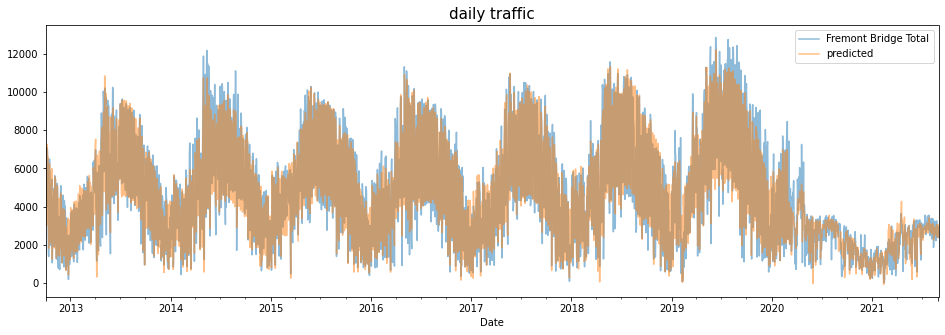

In [27]:
# plot actual and predicted values
daily_data[['Fremont Bridge Total','predicted']].plot(alpha=0.5, figsize=(16,5))
plt.title('daily traffic',fontsize=15)

Text(0.5, 1.0, 'monthly traffic')

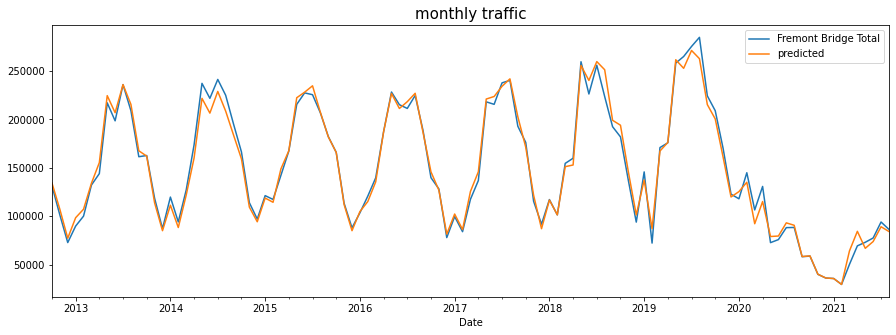

In [28]:
'plot actual and predicted monthly values'
daily_data[['Fremont Bridge Total','predicted']].resample('m').sum().plot(figsize=(15,5))
plt.title('monthly traffic',fontsize=15)

Text(0.5, 1.0, 'yearly traffic')

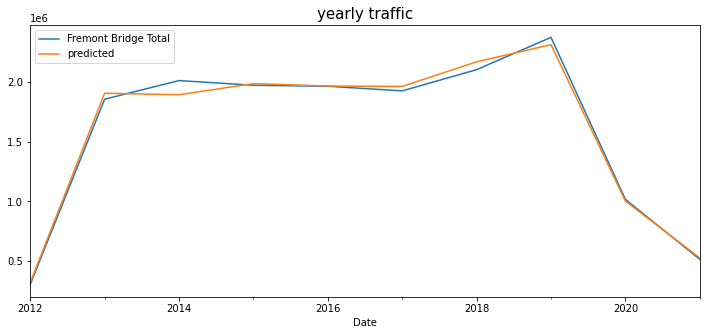

In [29]:
'plot actual and predicted monthly values'
daily_data[['Fremont Bridge Total','predicted']].resample('y').sum().plot(figsize=(12,5))
plt.title('yearly traffic',fontsize=15)

# Hyperparameters tuning and model evaluation

In [30]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y)

In [32]:
parameters = {
    'reg__alpha' : [0.01,0.1,1,10],
    'poly_features__degree' : [1,2]
}

In [33]:
# Grid Search
grid = GridSearchCV(pipe,parameters,cv=10,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=True)
grid.fit(X_train,y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    6.6s finished


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat_processor',
                                                                         Pipeline(steps=[('encoder',
                                                                                          OneHotEncoder())]),
                                                                         ['day_of_week',
                                                                          'month',
                                                                          'holiday',
                                                                          'covid']),
                                                                        ('num_processor',
                                                                         Pipeline(steps=[('scaler',
                                                                                          M

In [34]:
grid.best_params_

{'poly_features__degree': 2, 'reg__alpha': 0.1}

In [35]:
best_model = grid.best_estimator_

In [37]:
# Final prediction
daily_data['predicted'] = best_model.predict(X)

Text(0.5, 1.0, 'daily traffic')

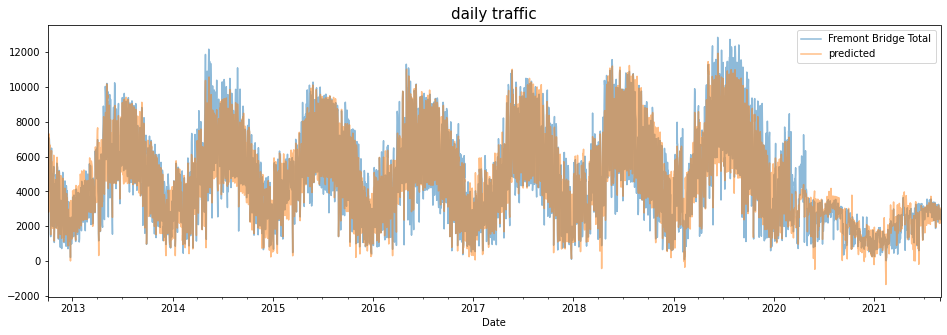

In [38]:
# plot actual and predicted values
daily_data[['Fremont Bridge Total','predicted']].plot(alpha=0.5, figsize=(16,5))
plt.title('daily traffic',fontsize=15)

## Model's coefficients

### no polynomial features

In [39]:
# pipeline
pipe = Pipeline(steps=[
    ('preprocessor',processor),
    ('poly_features',PolynomialFeatures(degree=1,include_bias=False)),
    ('reg', Ridge(alpha=1))
])
pipe.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['day_of_week', 'month',
                                                   'holiday', 'covid']),
                                                 ('num_processor',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'hours_daylight',
                                                   'TAVG', 'PRCP', 'AWND',
                                                   'SNOW'])])),
                ('poly_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('reg', Ridge(alpha=1))

In [ ]:
cat_features

In [40]:
# encoded feature names
encoded_feature_names = pipe['preprocessor'].named_transformers_['cat_processor']['encoder'].get_feature_names(cat_features)
list(encoded_feature_names)

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'holiday_0.0',
 'holiday_1.0',
 'covid_0',
 'covid_1']

In [41]:
feature_names = list(encoded_feature_names)+num_features
feature_names

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'holiday_0.0',
 'holiday_1.0',
 'covid_0',
 'covid_1',
 'year',
 'hours_daylight',
 'TAVG',
 'PRCP',
 'AWND',
 'SNOW']

In [42]:
len(feature_names)

29

In [43]:
# coefficients
coefficients = pipe['reg'].coef_
coefficients

array([  945.87701057,  1132.6857672 ,  1069.35662945,   811.52174338,
         260.57715922, -2032.27614606, -2187.74216376,  -191.19497105,
        -442.08293562,   -49.86751644,    97.97403889,   649.8025384 ,
         100.75741948,    67.74767987,   -18.39064072,   -54.88550016,
         286.15667686,   112.7658422 ,  -558.7826317 ,  1095.52844247,
       -1095.52844247,  2166.36969657, -2166.36969657,  1561.80971117,
        1356.8424643 ,  4985.67156571, -6182.86591879, -1266.28022783,
        -133.27502963])

In [44]:
# put coefficients into a dataframe
coeff_df = pd.DataFrame(data=coefficients,index=feature_names,columns=['coefficient'])
coeff_df

,coefficient
day_of_week_0,945.877011
day_of_week_1,1132.685767
day_of_week_2,1069.356629
day_of_week_3,811.521743
day_of_week_4,260.577159
day_of_week_5,-2032.276146
day_of_week_6,-2187.742164
month_1,-191.194971
month_2,-442.082936
month_3,-49.867516


<AxesSubplot:>

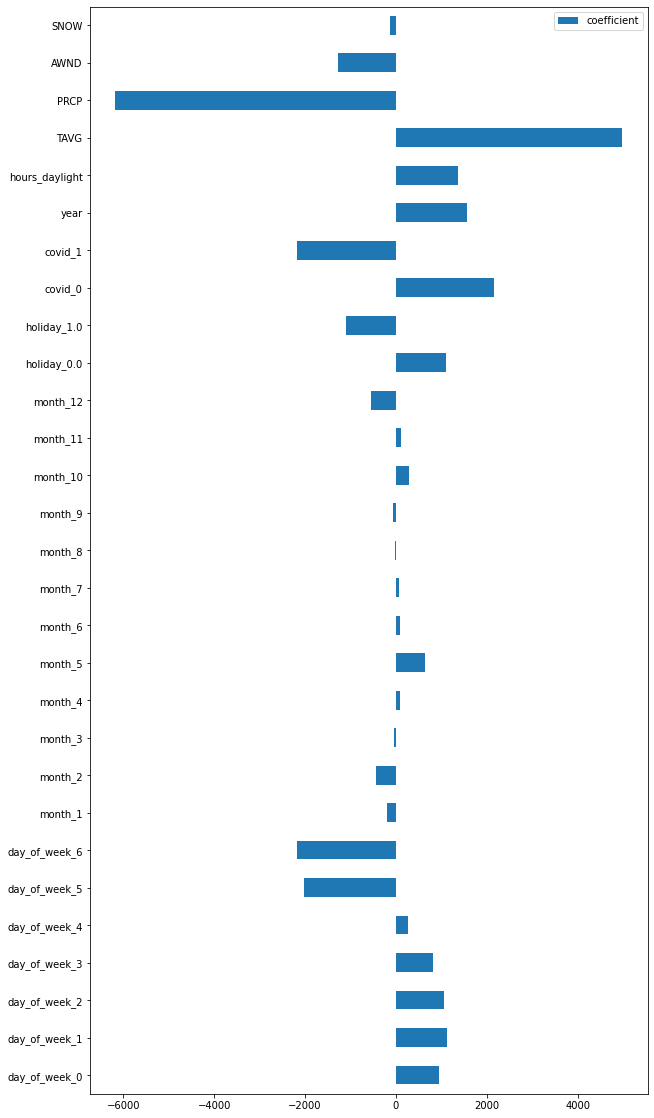

In [45]:
coeff_df.plot.barh(figsize=(10,20))

In [48]:
daily_data['predicted'] = pipe.predict(X)

In [47]:
daily_data[daily_data.PRCP>1.5]

,Fremont Bridge Total,day_of_week,month,year,covid,holiday,hours_daylight,TAVG,PRCP,AWND,SNOW,predicted
Date,,,,,,,,,,,,
2012-11-19,1934.0,0,11,2012,0,0.0,8.870849,51.5,2.13,13.42,0.0,1030.066518
2013-01-09,2694.0,2,1,2013,0,0.0,8.459353,42.5,1.51,11.41,0.0,1584.081928
2013-04-07,1154.0,6,4,2013,0,0.0,12.918653,45.0,1.54,8.72,0.0,-287.478024
2013-09-28,954.0,5,9,2013,0,0.0,11.584503,57.0,1.71,13.42,0.0,-247.019895
2014-03-05,3748.0,2,3,2014,0,0.0,10.973100,54.0,1.84,8.72,0.0,2745.225134
2015-03-15,478.0,6,3,2015,0,0.0,11.540499,49.0,2.20,9.40,0.0,-1335.762703
2015-11-14,810.0,5,11,2015,0,0.0,9.103349,49.0,1.86,10.07,0.0,-849.794583
2015-12-08,3512.0,1,12,2015,0,0.0,8.346399,52.0,2.13,13.87,0.0,981.049941
2016-10-13,2954.0,3,10,2016,0,0.0,10.701479,55.0,1.75,10.74,0.0,3241.745812


<AxesSubplot:xlabel='Date'>

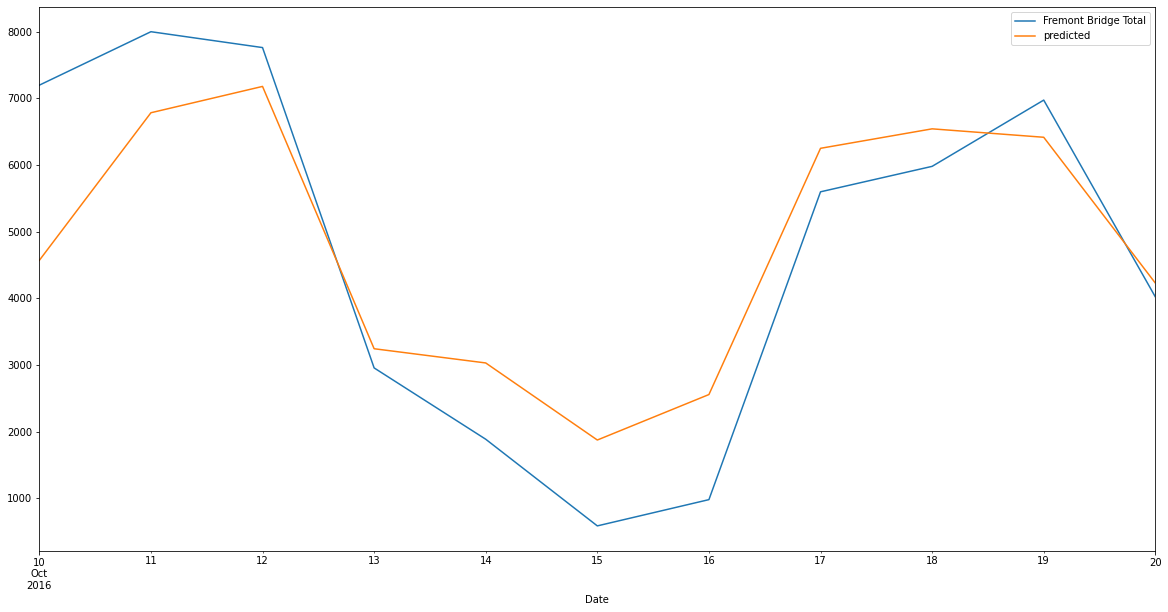

In [49]:
daily_data['2016-10-10':'2016-10-20'][['Fremont Bridge Total','predicted']].plot(figsize=(20,10))

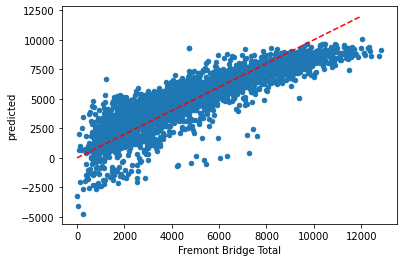

In [51]:
daily_data.plot.scatter(x='Fremont Bridge Total', y ='predicted')
plt.plot([0,12000],[0,12000],'r--')

### polynomial features (degree = 2)

In [52]:
# pipeline
pipe = Pipeline(steps=[
    ('preprocessor',processor),
    ('poly_features',PolynomialFeatures(degree=2,include_bias=False)),
    ('reg', Ridge(alpha=1))
])
pipe.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat_processor',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder())]),
                                                  ['day_of_week', 'month',
                                                   'holiday', 'covid']),
                                                 ('num_processor',
                                                  Pipeline(steps=[('scaler',
                                                                   MinMaxScaler())]),
                                                  ['year', 'hours_daylight',
                                                   'TAVG', 'PRCP', 'AWND',
                                                   'SNOW'])])),
                ('poly_features', PolynomialFeatures(include_bias=False)),
                ('reg', Ridge(alpha=1))])

In [53]:
encoded_feature_names = pipe['preprocessor'].named_transformers_['cat_processor']['encoder'].get_feature_names(cat_features)
feature_names = list(encoded_feature_names)+num_features
feature_names

['day_of_week_0',
 'day_of_week_1',
 'day_of_week_2',
 'day_of_week_3',
 'day_of_week_4',
 'day_of_week_5',
 'day_of_week_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'holiday_0.0',
 'holiday_1.0',
 'covid_0',
 'covid_1',
 'year',
 'hours_daylight',
 'TAVG',
 'PRCP',
 'AWND',
 'SNOW']

In [54]:
poly_feature_names = pipe['poly_features'].get_feature_names(feature_names)

In [55]:
len(poly_feature_names)

464

In [56]:
coefficients = pipe['reg'].coef_
len(coefficients)

464

In [57]:
coeff_df = pd.DataFrame(data=coefficients, index=poly_feature_names, columns=['coefficient'])
coeff_df

,coefficient
day_of_week_0,48.648871
day_of_week_1,-11.230564
day_of_week_2,35.752973
day_of_week_3,-209.684707
day_of_week_4,-56.064838
...,...
PRCP AWND,855.048434
PRCP SNOW,-92.602496
AWND^2,-289.223738
AWND SNOW,-144.716213


In [58]:
sorted_coeff_df = coeff_df.sort_values(by='coefficient', ascending=False)
sorted_coeff_df

,coefficient
PRCP^2,4870.354496
covid_0 TAVG,2867.891754
month_5 TAVG,2406.090630
year^2,2130.451337
covid_0 year,2018.041883
...,...
hours_daylight^2,-1966.950931
PRCP,-2265.435272
covid_0 PRCP,-2723.235861
covid_1 year,-3751.669966


<AxesSubplot:>

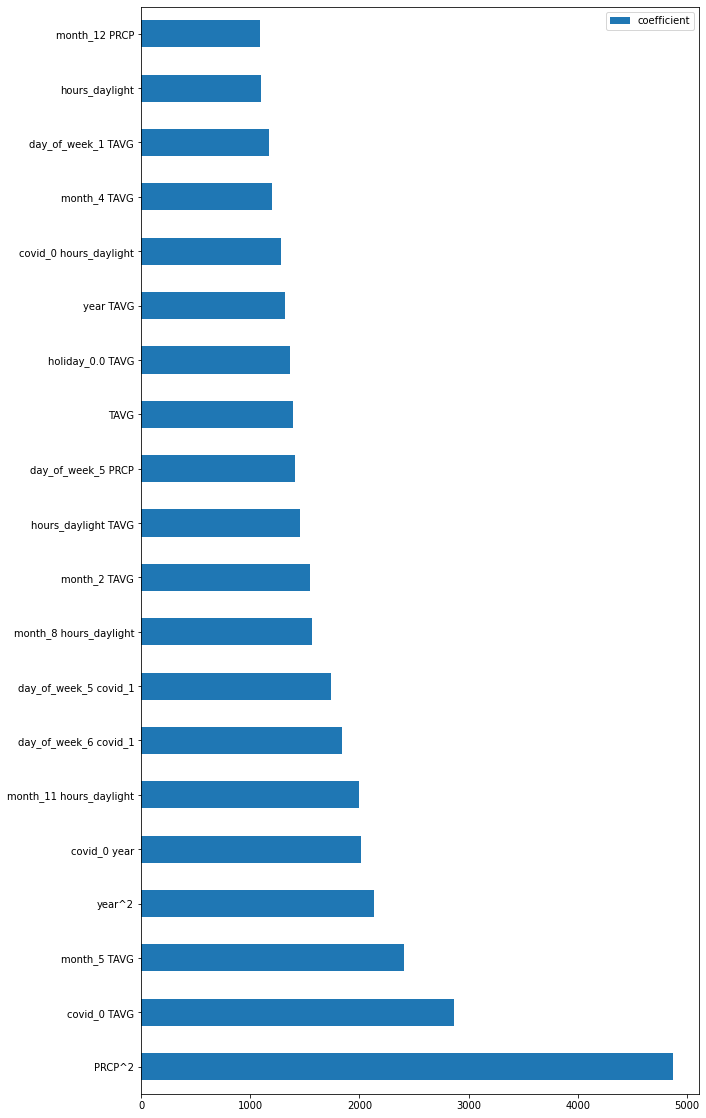

In [59]:
# top 20 positive coefficients
sorted_coeff_df.head(20).plot.barh(figsize=(10,20))

<AxesSubplot:>

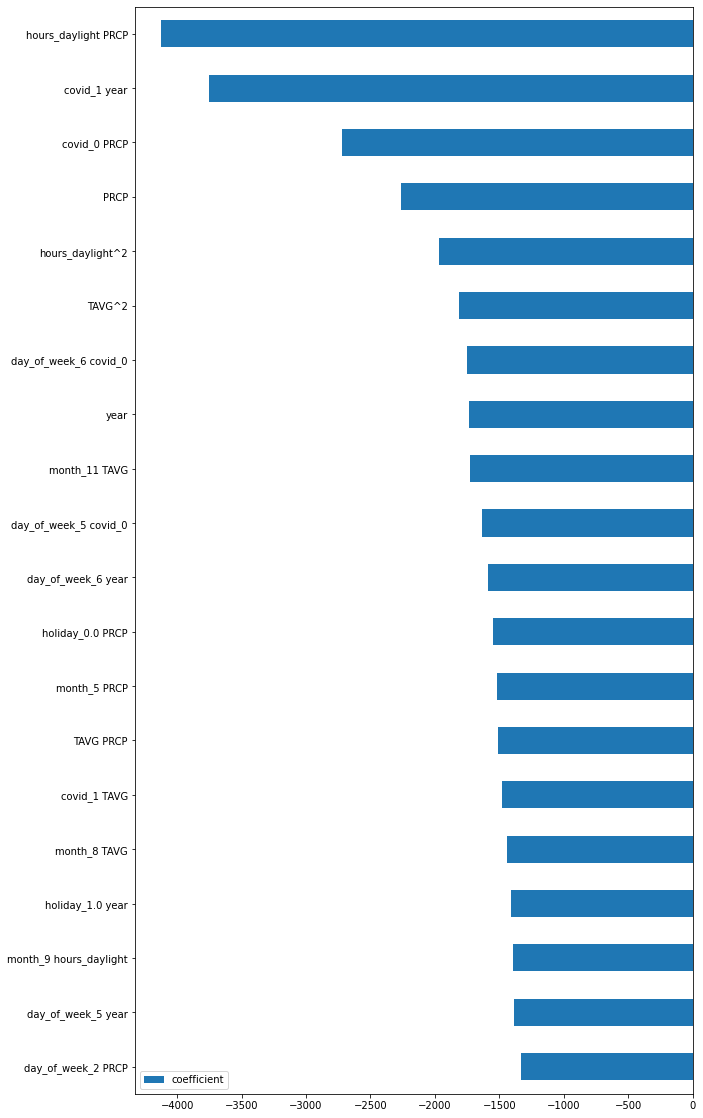

In [60]:
# top 20 negative coefficients
sorted_coeff_df.tail(20).plot.barh(figsize=(10,20))

In [61]:
daily_data['predicted'] = pipe.predict(X)

<AxesSubplot:xlabel='Date'>

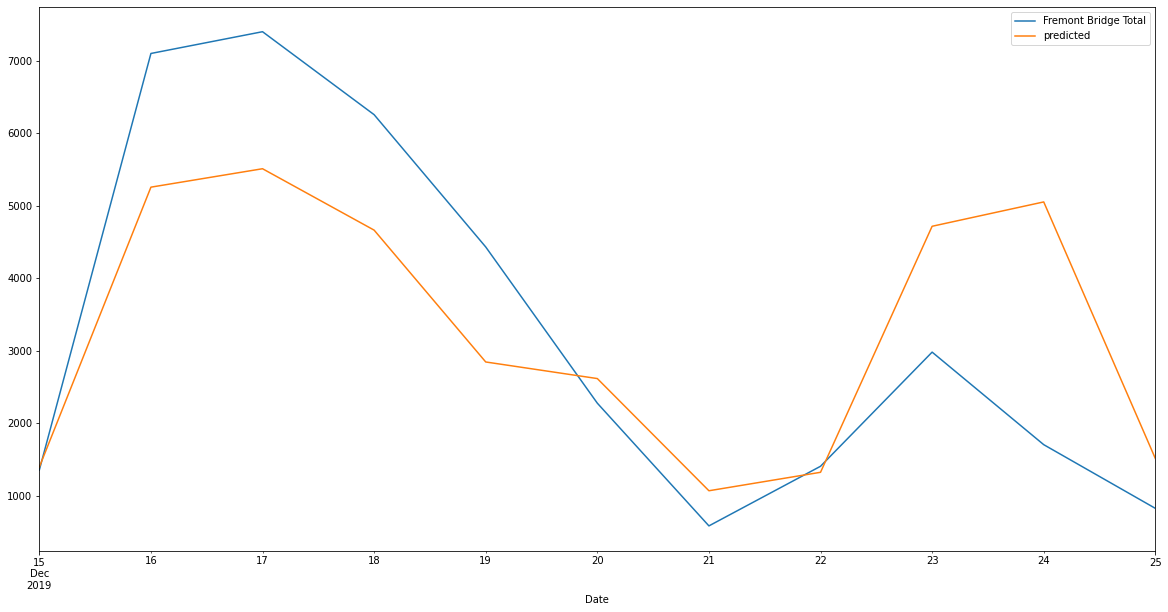

In [62]:
daily_data['2019-12-15':'2019-12-25'][['Fremont Bridge Total','predicted']].plot(figsize=(20,10))

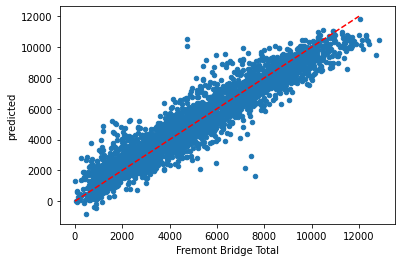

In [64]:
daily_data.plot.scatter(x='Fremont Bridge Total', y ='predicted')
plt.plot([0,12000],[0,12000],'r--')